##Visualizacion de los datos

In [69]:
!pip install feature.engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
# cargamos librerías necesarias
import numpy as np
import pandas as pd
import zipfile

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')


In [71]:
ARG_csv = pd.read_csv('/content/EMSE_DatosAbiertos.csv', sep= ';', decimal='.')
pd.options.display.max_columns = None #Para poder ver todas la columnas ya que trasponiendo son 89 colunas y me continua poniendo puntos suspensivos
ARG_csv.head()

,sitio,record,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q30 Other tobacco use,q31 Smoking cessation,q32 Smoking in their presence,q33 Parental tobacco use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,q59,q60,q61 Fruit consumption past 7 days,q62 Vegetable consumption past 7 days,q63 Soft drink consumption past 7 days,q64,q65,q66 Bullied on school property in past 12 months,q67 Bullied not on school property in past 12 months,q68 Cyber bullied in past 12 months,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,qn10 Did not eat food from a fast food restaurant (qn10),qn15 Were physically attacked,qn16 Were in a physical fight,qn17 Were seriously injured,qn18 Reported that their most serious injury was a broken bone or dislocated joint,qn19 Reported that their most serious injury was caused by a motor vehicle accident or being hit by a motor vehicle (qn19),qn22 Most of the time or always felt lonely,qn23 Most of the time or always were so worried about something that they could not sleep at night,qn24 Seriously considered attempting suicide,qn25 Made a plan about how they would attempt suicide,qn26 Attempted suicide,qn27 Did not have any close friends,qn28 Tried a cigarette before age 14 years,qn29 Currently smoked cigarettes,qn30 Currently used any tobacco products other than cigarettes,qn31 Tried to quit smoking cigarettes,qn32 Reported that people smoked in their presence,qn33 Had parents or guardians who used any form of tobacco,qn34 Drank alcohol before age 14 years,qn35 Currently drank alcohol,qn36 Usually drank two or more drinks per day,qn37 Usually obtained the alcohol they drank from friends,qn38 Ever drank so much alcohol that they were really drunk,"qn39 Ever got into trouble with their family or friends, missed school, or got into fights as a result of drinking alcohol",qn41 Ever used marijuana,qn42 Currently used marijuana,qn43 Ever used amphethamines or methamphetamines,qn44 Ever had sexual intercourse,qn45 Had sexual intercourse before age 14 years,qn46 Had sexual intercourse with two or more persons,qn47 Used a condom,qn48 Used a method of birth control other than condoms,qn49 Were not physically active,qn50 Did not walk or ride a bicycle to or from school,qn51 Did not attend physical education classes,qn52 Spent three or more hours per day doing sitting activities,qn54 Reported that most of the students in their school were most of the time or always kind and helpful,qn55 Reported that their parents or guardians most of the time or always checked to see if their homework was done,qn56 Reported that their parents or guardians most of the time or always understood their problems and worries,qn57 Reported that their parents or guardians most of the time or always really knew what they were doing with their free time,qn58 Reported that their parents or guardians never or rarely went through their things without their approval,qn59,qn60,qn61 Ate fruit two or more times per day in past 7 days,qn62 Ate vegetables two or m

In [ ]:
ARG_csv.head()

In [ ]:

print(ARG_csv.shape)

(56981, 155)


In [ ]:
print(ARG_csv.isnull().sum())
#print(ARG_csv.dtypes)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

##PREPROCESADO

In [ ]:
def drop_null_columns(df, threshold):
    null_column=[]
    for column in df.columns:
        null_percentage = df[column].isnull().sum() / len(df) * 100
        if null_percentage > threshold:
            print(f"El porcentaje de valores nulos en la columna {column} es mayor al {threshold}% es de {null_percentage}")
            null_column.append(column)
    print("Columnas null: ",null_column )
    print("numero de columnas null: ",len(null_column) )
    for column in null_column:
        df.drop(column, axis=1, inplace=True)
    return df

In [ ]:
df_procesado = drop_null_columns(ARG_csv, 37)

El porcentaje de valores nulos en la columna qn18 Reported that their most serious injury was a broken bone or dislocated joint es mayor al 37% es de 74.7705375476036
El porcentaje de valores nulos en la columna qn19 Reported that their most serious injury was caused by a motor vehicle accident or being hit by a motor vehicle (qn19) es mayor al 37% es de 74.11417841034731
El porcentaje de valores nulos en la columna qn28 Tried a cigarette before age 14 years es mayor al 37% es de 60.509643565398996
El porcentaje de valores nulos en la columna qn31 Tried to quit smoking cigarettes  es mayor al 37% es de 80.08107965813166
El porcentaje de valores nulos en la columna qn36 Usually drank two or more drinks per day  es mayor al 37% es de 45.072919043189835
El porcentaje de valores nulos en la columna qn37 Usually obtained the alcohol they drank from friends es mayor al 37% es de 47.589547392990646
El porcentaje de valores nulos en la columna qn45 Had sexual intercourse before age 14 years es

In [ ]:
df_procesado.shape

(56981, 139)

#Eliminamos todas las columnas que no tengan información o que son datos repetidos

In [ ]:
def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
        df.drop(column, axis=1, inplace=True)
    return df

In [ ]:
columns_to_drop = ["sitio", "record", "weight", "stratum", "psu", "q59", "q60", "q64", "q65", "q69", "q70", "q71", "q72", "q73", "q74", "q75", "q76", "q77", "q78", "q79", "q80", "q81", "qn59", "qn60", "qn64", "qn65", "qn70", "qn76", "qn77", "qn78", "qn79", "qn80", "qn81","q66 Bullied on school property in past 12 months","q67 Bullied not on school property in past 12 months","q68 Cyber bullied in past 12 months"]
df = drop_columns(df_procesado, columns_to_drop)

In [ ]:
columns_to_drop=["qn10 Did not eat food from a fast food restaurant (qn10)","qnff1g Ate food from a fast food restaurant one or more days", "qnff3g Ate food from a fast food restaurant three or more days", "qn15 Were physically attacked ", "qn16 Were in a physical fight", "qn17 Were seriously injured", "qn22 Most of the time or always felt lonely ", "qn23 Most of the time or always were so worried about something that they could not sleep at night", "qn24 Seriously considered attempting suicide", "qn25 Made a plan about how they would attempt suicide", "qn26 Attempted suicide", "qn27 Did not have any close friends", "qn29 Currently smoked cigarettes", "qn30 Currently used any tobacco products other than cigarettes", "qntob2g Currently used any tobacco product", "qnff2g Ate food from a fast food restaurant two or more days", "qn32 Reported that people smoked in their presence", "qn33 Had parents or guardians who used any form of tobacco", "qn34 Drank alcohol before age 14 years", "qn35 Currently drank alcohol", "qn38 Ever drank so much alcohol that they were really drunk", "qn39 Ever got into trouble with their family or friends, missed school, or got into fights as a result of drinking alcohol ", "qn41 Ever used marijuana ", "qn42 Currently used marijuana", "qn43 Ever used amphethamines or methamphetamines", "qn44 Ever had sexual intercourse", "qn46 Had sexual intercourse with two or more persons", "qn49 Were not physically active", "qnpa5g Were physically active at least 60 minutes per day on 5 or more days", "qnpa7g Were physically active at least 60 minutes per day on all 7 days", "qn50 Did not walk or ride a bicycle to or from school", "qn51 Did not attend physical education classes", "qnpe3g Attended physical education classes on three or more days", "qnpe5g Attended physical education classes on five or more days", "qn52 Spent three or more hours per day doing sitting activities", "qn54 Reported that most of the students in their school were most of the time or always kind and helpful", "qn55 Reported that their parents or guardians most of the time or always checked to see if their homework was done", "qn56 Reported that their parents or guardians most of the time or always understood their problems and worries", "qn57 Reported that their parents or guardians most of the time or always really knew what they were doing with their free time", "qn58 Reported that their parents or guardians never or rarely went through their things without their approval ", "qn61 Ate fruit two or more times per day in past 7 days", "qn62 Ate vegetables two or more times per day in past 7 days", "qn63 Drank carbonated soft drink one or more times per day in past 7 days","qnnotb2g Did not currently use any tobacco products"]
df = drop_columns(df, columns_to_drop)

In [ ]:
columns_to_drop=["q30 Other tobacco use", "q31 Smoking cessation","q32 Smoking in their presence", "q33 Parental tobacco use", "q61 Fruit consumption past 7 days","q62 Vegetable consumption past 7 days", "q63 Soft drink consumption past 7 days ","qn69 Were underweight"]
df = drop_columns(df, columns_to_drop)

In [ ]:
df.shape

(56981, 51)

In [ ]:
df = df.dropna(subset=['q15 Physically attacked'], axis=0)
df = df.dropna(subset=['qn66 Bullied on school property in past 12 months','qn67 Bullied not on school property in past 12 months','qn68 Cyber bullied in past 12 months'], axis=0)

In [ ]:
# Cuenta los valores nulos en cada fila
null_counts = df.isnull().sum(axis=1)

# Crea una columna que indica si más de la mitad de los valores son nulos
df['mas_de_la_mitad_nulos'] = null_counts > (df.shape[1]/2)

# Elimina las filas donde más de la mitad de los valores son nulos
df = df[~df['mas_de_la_mitad_nulos']].reset_index(drop=True)

In [ ]:
df.drop('mas_de_la_mitad_nulos', axis=1, inplace=True)

In [ ]:
df.shape
df.head()

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese
0,3.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,6.0,3.0,1.0,2.0,1.0,3.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
1,4.0,1.0,4.0,1.67,56.0,1.0,1.0,1.0,1.0,3.0,2.0,8.0,1.0,2.0,NaN,2.0,1.0,4.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,6.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
2,6.0,1.0,2.0,1.73,70.0,1.0,4.0,1.0,3.0,1.0,1.0,NaN,1.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,5.0,1.0,6.0,3.0,1.0,3.0,1.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,3.0,2.0,2.0,1.0,4.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
4,3.0,1.0,2.0,1.72,48.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,3.0,7.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


#Imputamos los valos nulls con el método KNNImputer
KNNImputer es un método de imputación de valores faltantes en datos numéricos utilizando el algoritmo K-vecinos más cercanos (K-Nearest Neighbors en inglés).

El objetivo de este método es estimar los valores faltantes basándose en la información de los valores disponibles en las mismas filas y columnas. Para esto, se busca un número determinado de vecinos más cercanos y se utiliza la información de esos vecinos para estimar el valor faltante.

In [ ]:
from sklearn.impute import KNNImputer

# Seleccionar las columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Crear una instancia de KNNImputer con el número de vecinos deseado
imputer = KNNImputer(n_neighbors=5)

# Imputar los valores faltantes
imputed_data = imputer.fit_transform(df[num_cols])

# Actualizar el DataFrame con los valores imputados
df[num_cols] = imputed_data

In [ ]:
df.shape

(54910, 51)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df.to_csv('/content/drive/MyDrive/depurado.csv', index=False)

Mounted at /content/drive


##CREACIÓN DE MODELOS

In [ ]:
# Añadimos la nueva columna con ceros
df = df.assign(any_bullying=np.zeros(df.shape[0]))
df.head()

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese,any_bullying
0,3.0,2.0,2.0,1.62,52.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0,3.0,1.0,2.0,1.0,3.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0,0.0
1,4.0,1.0,4.0,1.67,56.0,1.0,1.0,1.0,1.0,3.0,2.0,8.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,6.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
2,6.0,1.0,2.0,1.73,70.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,5.0,1.0,6.0,3.0,1.0,3.0,1.0,3.4,3.4,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
3,3.0,2.0,2.0,1.56,45.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0,0.0
4,3.0,1.0,2.0,1.72,48.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,3.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0


In [ ]:
df = df.reset_index(drop=True)

In [ ]:

for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 or df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 or df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1:
    df.loc[i, 'any_bullying'] = 1

In [ ]:
unique_values = df['qn66 Bullied on school property in past 12 months'].unique()
print(unique_values)
dtype = df['qn66 Bullied on school property in past 12 months'].dtype
print(dtype)

[2. 1.]
float64


#Creación variable objetivo

In [ ]:
cont=0
df = df.assign(risk_bullying=np.zeros(df.shape[0]))
for i in range(len(df)):
  if df.loc[i, 'any_bullying'] == 1:
    if df.loc[i, 'qn66 Bullied on school property in past 12 months']==1:
      df.loc[i, 'risk_bullying'] +=1
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months']==1:
      df.loc[i, 'risk_bullying'] +=1
    if df.loc[i, 'qn68 Cyber bullied in past 12 months']==1:
      df.loc[i, 'risk_bullying'] +=1
  #Según el positivo enlas variables de bullying las vamos acumulando en la variable objetivo

In [ ]:
num_valores_unicos = df['risk_bullying'].nunique()
print(num_valores_unicos)

4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from keras.optimizers import SGD

In [ ]:
df.head()

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese,any_bullying,risk_bullying
0,3.0,2.0,2.0,1.62,52.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0,3.0,1.0,2.0,1.0,3.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0,0.0,0.0
1,4.0,1.0,4.0,1.67,56.0,1.0,1.0,1.0,1.0,3.0,2.0,8.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,6.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
2,6.0,1.0,2.0,1.73,70.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,5.0,1.0,6.0,3.0,1.0,3.0,1.0,3.4,3.4,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
3,3.0,2.0,2.0,1.56,45.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0,0.0,0.0
4,3.0,1.0,2.0,1.72,48.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,3.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0


In [ ]:
#Preparamos los datos y las etiquetas en esta primera parte no utilizo las imagenes, por lo tanto me lo quito del dataset
x = df.drop(labels=['qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df['risk_bullying']
print(y)

In [ ]:

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)


In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)

# Comprobar el tamaño del dataset
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)
print("\n")
print("El conjunto de entrenamiento tiene dimensiones: ", y_train.shape)
print("El conjunto de validación tiene dimensiones: ",y_val.shape)
print("El conjunto de test tiene dimensiones: ",y_test.shape)

El conjunto de entrenamiento tiene dimensiones:  (42005, 48)
El conjunto de validación tiene dimensiones:  (4668, 48)
El conjunto de test tiene dimensiones:  (8237, 48)


El conjunto de entrenamiento tiene dimensiones:  (42005,)
El conjunto de validación tiene dimensiones:  (4668,)
El conjunto de test tiene dimensiones:  (8237,)


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from pandas.core.common import flatten
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from keras.utils import to_categorical
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


x_train.shape
y_train.shape

(42005, 4)

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.001
num_epochs = 100
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final))
  # Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate), metrics=["accuracy"])

  # Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:

# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

258/258 [==============================] - 1s 2ms/step
Precisión: 60.20%


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:

# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[4879   50    2    0]
 [1759   72    7    0]
 [ 868   72    8    0]
 [ 429   81   10    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.99      0.76      4931
           1       0.26      0.04      0.07      1838
           2       0.30      0.01      0.02       948
           3       0.00      0.00      0.00       520

    accuracy                           0.60      8237
   macro avg       0.29      0.26      0.21      8237
weighted avg       0.46      0.60      0.47      8237

Accuracy score: 0.6020


Malos datos obtenidos debido al desbalanceo del dataset

#Vamos a realizar un aumento de la variable 1 de forma sintética para balancear el dataset

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Preparamos los datos y las etiquetas en esta primera parte no utilizo las imagenes, por lo tanto me lo quito del dataset
x = df.drop(labels=['qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df['risk_bullying']
print(y)

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
# Aplicar la función fit_resample para obtener los datos balanceados
X_res, y_res = sm.fit_resample(x, y)

In [ ]:
# Contar el número de valores 0 y 1
num_zeros = np.sum(y_res == 0)
num_ones = np.sum(y_res == 1)

# Imprimir los resultados
print("Número de ceros: ", num_zeros)
print("Número de unos: ", num_ones)

Número de ceros:  32928
Número de unos:  32928


In [ ]:

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(X_res)

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)

In [ ]:
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


x_train.shape
y_train.shape

(42005, 4)

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.001
num_epochs = 100
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final))
  # Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate), metrics=["accuracy"])

  # Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

258/258 [==============================] - 0s 2ms/step
Precisión: 60.34%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[4863   68    0    0]
 [1732  106    0    0]
 [ 846  101    1    0]
 [ 414  104    2    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      4931
           1       0.28      0.06      0.10      1838
           2       0.33      0.00      0.00       948
           3       0.00      0.00      0.00       520

    accuracy                           0.60      8237
   macro avg       0.31      0.26      0.21      8237
weighted avg       0.47      0.60      0.48      8237

Accuracy score: 0.6034


# Realizamos el modelo con Cyber como variable

In [ ]:
df['bullying'] = 0

Creamos la variable objetivo con dos posibles valores existe bulling o no deendiendo de las varibles objetivo qn66 Bullied on school property in past 12 y qn67 Bullied not on school property in past 12 months. De la siguiente forma

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2:
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2: 
      df.loc[i, 'bullying'] = 0
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1:
      df.loc[i, 'bullying'] = 1   
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1: 
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
      df.loc[i, 'bullying'] = 1
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
      df.loc[i, 'bullying'] = 1
 

In [ ]:
df.head()

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese,any_bullying,risk_bullying,bullying
0,3.0,2.0,2.0,1.62,52.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0,3.0,1.0,2.0,1.0,3.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0,0.0,0.0,0
1,4.0,1.0,4.0,1.67,56.0,1.0,1.0,1.0,1.0,3.0,2.0,8.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,6.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0
2,6.0,1.0,2.0,1.73,70.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,5.0,1.0,6.0,3.0,1.0,3.0,1.0,3.4,3.4,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0
3,3.0,2.0,2.0,1.56,45.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0,0.0,0.0,0
4,3.0,1.0,2.0,1.72,48.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,3.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0


In [ ]:
#Preparamos los datos y las etiquetas en esta primera parte no utilizo las imagenes, por lo tanto me lo quito del dataset
x = df.drop(labels=['qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df['bullying']
print(y)

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
# Aplicar la función fit_resample para obtener los datos balanceados
X_res, y_res = sm.fit_resample(x, y)

In [ ]:
# Contar el número de valores 0 y 1
num_zeros = np.sum(y_res == 0)
num_ones = np.sum(y_res == 1)

# Imprimir los resultados
print("Número de ceros: ", num_zeros)
print("Número de unos: ", num_ones)

Número de ceros:  37352
Número de unos:  37352


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_res = scaler.fit_transform(X_res)
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 2
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 300
batch_size = 300

model = Sequential()
model.add(Dense(1200, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(900, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(700, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)
model.save("model_1.h5")
# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

Otra estructura de modelo para mejorar la precisión del modelo

[INFO]: Entrenando red neuronal...
Epoch 1/300
286/286 [==============================] - 7s 19ms/step - loss: 5.2672 - accuracy: 0.6197 - val_loss: 3.6905 - val_accuracy: 0.6471
Epoch 2/300
286/286 [==============================] - 7s 25ms/step - loss: 2.7877 - accuracy: 0.6376 - val_loss: 2.0813 - val_accuracy: 0.6449
Epoch 3/300
286/286 [==============================] - 4s 15ms/step - loss: 1.6778 - accuracy: 0.6391 - val_loss: 1.3579 - val_accuracy: 0.6441
Epoch 4/300
286/286 [==============================] - 3s 9ms/step - loss: 1.1760 - accuracy: 0.6386 - val_loss: 1.0274 - val_accuracy: 0.6482
Epoch 5/300
286/286 [==============================] - 3s 9ms/step - loss: 0.9447 - accuracy: 0.6395 - val_loss: 0.8719 - val_accuracy: 0.6449
Epoch 6/300
286/286 [==============================] - 4s 14ms/step - loss: 0.8331 - accuracy: 0.6373 - val_loss: 0.7939 - val_accuracy: 0.6420
Epoch 7/300
286/286 [==============================] - 4s 14ms/step - loss: 0.7749 - accuracy: 0.6395 -

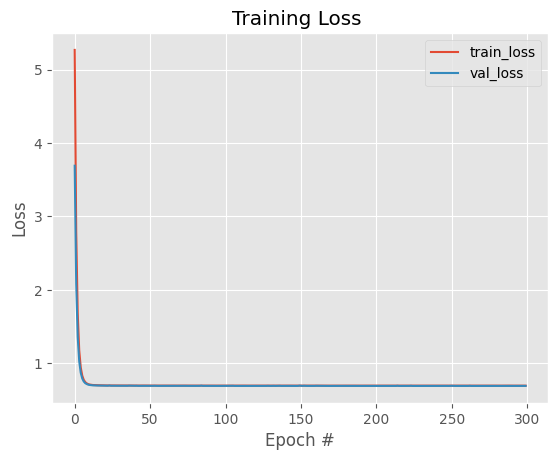

In [73]:
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 300
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Guardar el modelo
model.save("model_1.h5")

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [74]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

351/351 [==============================] - 1s 2ms/step
Precisión: 63.97%


In [75]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[4200 1487]
 [2550 2969]]

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.68      5687
           1       0.67      0.54      0.60      5519

    accuracy                           0.64     11206
   macro avg       0.64      0.64      0.64     11206
weighted avg       0.64      0.64      0.64     11206

Accuracy score: 0.6397


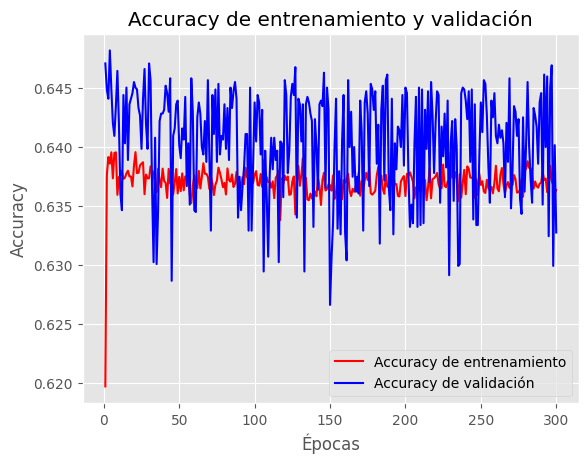

In [76]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Vamos a realizar un modelo ensamblado a partir de otros dos modelos, donde los datos estaran desbalanceados pero se dara más importancia a la variable 1. y otro modelo donde no se le de importancia y al estar desbalanceado pueda predecir mejor la variable 0. Luego juntamos ambos modelos para obtener una predicción conjuta

In [ ]:
#Preparamos los datos y las etiquetas en esta primera parte no utilizo las imagenes, por lo tanto me lo quito del dataset
x = df.drop(labels=['qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df['bullying']
print(y)

In [82]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 2
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/300
211/211 [==============================] - 4s 14ms/step - loss: 5.6976 - accuracy: 0.6858 - val_loss: 4.3356 - val_accuracy: 0.7093
Epoch 2/300
211/211 [==============================] - 2s 9ms/step - loss: 3.4586 - accuracy: 0.7035 - val_loss: 2.7159 - val_accuracy: 0.7119
Epoch 3/300
211/211 [==============================] - 2s 9ms/step - loss: 2.2302 - accuracy: 0.7063 - val_loss: 1.8173 - val_accuracy: 0.7121
Epoch 4/300
211/211 [==============================] - 2s 9ms/step - loss: 1.5491 - accuracy: 0.7069 - val_loss: 1.3181 - val_accuracy: 0.7119
Epoch 5/300
211/211 [==============================] - 2s 9ms/step - loss: 1.1702 - accuracy: 0.7057 - val_loss: 1.0405 - val_accuracy: 0.7136
Epoch 6/300
211/211 [==============================] - 2s 9ms/step - loss: 0.9583 - accuracy: 0.7057 - val_loss: 0.8823 - val_accuracy: 0.7121
Epoch 7/300
211/211 [==============================] - 3s 14ms/step - loss: 0.8357 - accuracy: 0.7063 - va

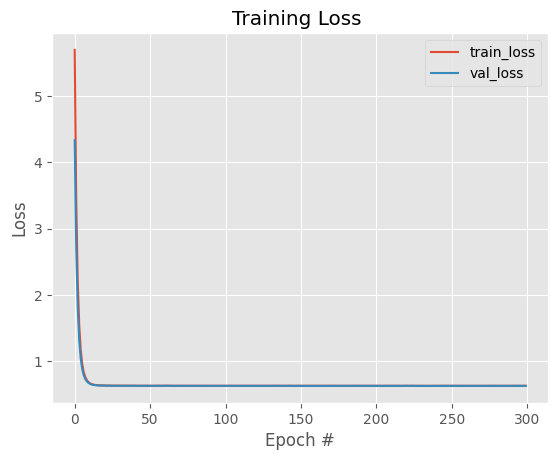

In [83]:
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 300
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Guardar el modelo
model.save("model_3.h5")

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [84]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

258/258 [==============================] - 1s 2ms/step
Precisión: 70.27%


In [85]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[5304  243]
 [2206  484]]

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.81      5547
           1       0.67      0.18      0.28      2690

    accuracy                           0.70      8237
   macro avg       0.69      0.57      0.55      8237
weighted avg       0.69      0.70      0.64      8237

Accuracy score: 0.7027


Creamos un modelo dando mas peso a la varible 1 para que el modelo entrene mejor para predecir esta varible

In [86]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros del modelo
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 300
batch_size = 300

# Definir la función de pérdida ponderada
from keras import backend as K
# Definir pesos de clases
class_weight = {0: 1, 1: 5}
def weighted_binary_crossentropy(y_true, y_pred):
    # Pesos de las clases
    class_weights = K.constant([1, 5]) # Dar un peso mayor a la clase 1
    
    # Función de pérdida
    y_pred = K.clip(y_pred, K.epsilon(), 1-K.epsilon())
    weighted_cross_entropy = -(y_true * K.log(y_pred) * class_weights)
    return K.mean(weighted_cross_entropy, axis=-1)


# Definir el modelo
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilar el modelo con la función de pérdida ponderada y el optimizador Adam
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenar el modelo
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size, class_weight=class_weight)

# Guardar el modelo
model.save("model_4.h5")

# Evaluar el modelo con los datos de prueba
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

[INFO]: Entrenando red neuronal...
Epoch 1/300
141/141 [==============================] - 7s 34ms/step - loss: 6.9413 - accuracy: 0.3190 - val_loss: 5.4329 - val_accuracy: 0.3151
Epoch 2/300
141/141 [==============================] - 2s 12ms/step - loss: 5.1156 - accuracy: 0.3189 - val_loss: 3.9981 - val_accuracy: 0.3151
Epoch 3/300
141/141 [==============================] - 2s 18ms/step - loss: 3.9155 - accuracy: 0.3305 - val_loss: 3.0465 - val_accuracy: 0.3404
Epoch 4/300
141/141 [==============================] - 3s 20ms/step - loss: 3.1145 - accuracy: 0.3558 - val_loss: 2.3690 - val_accuracy: 0.3790
Epoch 5/300
141/141 [==============================] - 2s 12ms/step - loss: 2.5726 - accuracy: 0.3729 - val_loss: 1.9377 - val_accuracy: 0.3805
Epoch 6/300
141/141 [==============================] - 2s 12ms/step - loss: 2.2047 - accuracy: 0.3758 - val_loss: 1.6094 - val_accuracy: 0.4115
Epoch 7/300
141/141 [==============================] - 2s 11ms/step - loss: 1.9543 - accuracy: 0.3773

In [87]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

258/258 [==============================] - 0s 2ms/step
Precisión: 41.19%


In [88]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[ 813 4734]
 [ 110 2580]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.15      0.25      5547
           1       0.35      0.96      0.52      2690

    accuracy                           0.41      8237
   macro avg       0.62      0.55      0.38      8237
weighted avg       0.71      0.41      0.34      8237

Accuracy score: 0.4119


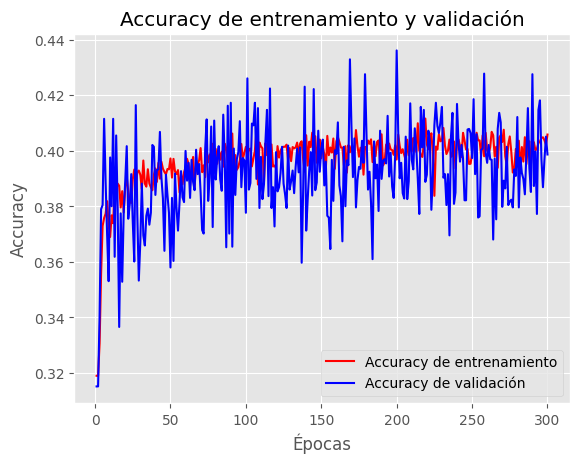

In [89]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Ensamblaje de ambos modelos

Vamos mediante los dos modelos anteriores crear un nuevo modelo

In [90]:
from keras.models import load_model

# Cargar el modelo guardado
model_1 = load_model('model_3.h5')
model_2 = load_model('model_4.h5')

In [91]:
# Obtener las predicciones del modelo 1
pred_1 = model_1.predict(x_test)

# Obtener las predicciones del modelo 2
pred_2 = model_2.predict(x_test)

# Calcular la predicción promedio de los dos modelos
pred_avg = (pred_1 + pred_2) / 2

# Redondear las predicciones promedio a la clase más cercana (0 o 1)
pred_labels = np.round(pred_avg)

# Definir modelo ensamblado
model_ensemble = Sequential()
model_ensemble.add(Dense(32, input_shape=(x_test.shape[1],), activation='relu'))
model_ensemble.add(Dense(16, activation='relu'))
model_ensemble.add(Dense(2, activation='sigmoid'))
model_ensemble.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluar el modelo ensamblado
print("[INFO]: Evaluando modelo ensamblado...")
ensemble_acc = accuracy_score(y_test, pred_labels)
print("Accuracy del modelo ensamblado: {:.2f}%".format(ensemble_acc * 100))

# Entrenar modelo ensamblado
model_ensemble.fit(x_test, y_test, epochs=10, batch_size=32, verbose=0)

# Obtener predicciones del modelo ensamblado
predictions = model_ensemble.predict(x_test, batch_size=batch_size)

# Obtener las predicciones del modelo
predictions = model_ensemble.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

258/258 [==============================] - 1s 3ms/step
[INFO]: Evaluando modelo ensamblado...
Accuracy del modelo ensamblado: 59.28%
258/258 [==============================] - 0s 1ms/step
Precisión: 71.91%


In [92]:
# Obtener las predicciones del modelo
predictions = model_ensemble.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

258/258 [==============================] - 0s 1ms/step
Precisión: 71.91%


In [93]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[5137  410]
 [1904  786]]

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      5547
           1       0.66      0.29      0.40      2690

    accuracy                           0.72      8237
   macro avg       0.69      0.61      0.61      8237
weighted avg       0.71      0.72      0.68      8237

Accuracy score: 0.7191


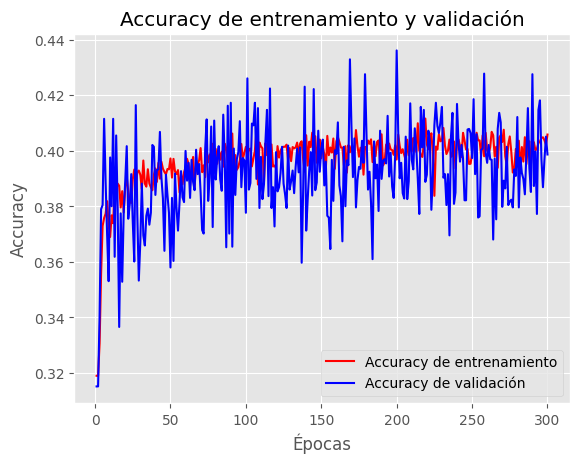

In [94]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Se logra mejorar la sensibilidad pero aun sigue siendo insuficiente para predecir los casos de bullying